# Investigation wind forecast performance
===

Weather forecasts are not perfect and there are differences between models.

# Task

Thus we want your to perform a investigation on forecast performance of different models. You can access the data here 

Have a look below how the data looks like and how it is loaded in.

1. Get yourself familiar with the datasets you have. Make data exploration as you think are needed.
2. Define statistical metrics for wind speed and direction at different stations to evalute the performace of the different models
3. Apply them on icon_d2, icon_eu, era5
4. You talked about time series forecasting :) Apply a model you have in mind to the dataset.
4. Which model is the best? Can you explain differences between stations?





**To have an easy start. Here is an example to load the netcdf file:**

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
wind_data = xr.open_dataset("./wind_2023.nc")

In [5]:
wind_data.dims

Frozen({'station_id': 10, 'time': 8760})

In [6]:
wind_data.coords

Coordinates:
  * station_id         (station_id) int64 303 433 701 1200 ... 4625 5426 15207
  * time               (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
    station_longitude  (station_id) float32 ...
    station_latitude   (station_id) float32 ...
    station_height     (station_id) float64 ...
    station_name       (station_id) object ...
    state              (station_id) object ...
    longitude          (station_id) float32 ...
    latitude           (station_id) float32 ...
    icon_d2_run        (time) datetime64[ns] ...
    icon_d2_step       (time) timedelta64[ns] ...
    icon_eu_run        (time) datetime64[ns] ...
    icon_eu_step       (time) timedelta64[ns] ...

In [7]:
wind_data.data_vars

Data variables:
    measured_wind_direction_quality  (station_id, time) float64 ...
    measured_wind_speed_quality      (station_id, time) float64 ...
    measured_wind_direction          (station_id, time) float64 ...
    measured_wind_speed              (station_id, time) float64 ...
    era5_wind_speed                  (station_id, time) float32 ...
    era5_wind_direction              (station_id, time) float32 ...
    icon_d2_wind_speed               (station_id, time) float64 ...
    icon_d2_wind_direction           (station_id, time) float64 ...
    icon_eu_wind_speed               (station_id, time) float64 ...
    icon_eu_wind_direction           (station_id, time) float64 ...

In [8]:
# Data
wind_data

<xarray.Dataset>
Dimensions:                          (station_id: 10, time: 8760)
Coordinates: (12/13)
  * station_id                       (station_id) int64 303 433 ... 5426 15207
  * time                             (time) datetime64[ns] 2023-01-01 ... 202...
    station_longitude                (station_id) float32 ...
    station_latitude                 (station_id) float32 ...
    station_height                   (station_id) float64 ...
    station_name                     (station_id) object ...
    ...                               ...
    longitude                        (station_id) float32 ...
    latitude                         (station_id) float32 ...
    icon_d2_run                      (time) datetime64[ns] ...
    icon_d2_step                     (time) timedelta64[ns] ...
    icon_eu_run                      (time) datetime64[ns] ...
    icon_eu_step                     (time) timedelta64[ns] ...
Data variables:
    measured_wind_direction_quality  (station_id, time) float64 ...
    measured_wind_speed_quality      (station_id, time) float64 ...
    measured_wind_direction          (station_id, time) float64 ...
    measured_wind_speed              (station_id, time) float64 ...
    era5_wind_speed                  (station_id, time) float32 ...
    era5_wind_direction              (station_id, time) float32 ...
    icon_d2_wind_speed               (station_id, time) float64 ...
    icon_d2_wind_direction           (station_id, time) float64 ...
    icon_eu_wind_speed               (station_id, time) float64 ...
    icon_eu_wind_direction           (station_id, time) float64 ...

# Inspecting Different Features:
Looking into the atributes of the features to understand what does it convey

In [9]:
def display_attributes(wind_data):
    """
    This function displays the attributes of each variable and coordinate in the given Xarray Dataset.

    Args:
    wind_data (xr.Dataset): The Xarray Dataset containing the data and metadata.

    Output:
    Prints the metadata (attributes) of each variable and coordinate in the dataset.

    This function iterates over all variables and coordinates in the provided Xarray Dataset. For each item,
    it checks if there are any attributes. If attributes are present, it prints the name of the variable or coordinate
    along with its attributes in a formatted manner.

    Example Usage:
    display_attributes(wind_data)
    """
    atr_var = list(wind_data.data_vars) + list(wind_data.coords)
    for i in atr_var:
        if wind_data[i].attrs:
            print(f'Attributes for {i}:')
            for key, val in wind_data[i].attrs.items():
                print(f'  {key}: {val}')

# Display attributes
display_attributes(wind_data)

Attributes for icon_d2_run:
  long_name: initial time of forecast
  standard_name: forecast_reference_time
Attributes for icon_d2_step:
  long_name: time since forecast_reference_time
  standard_name: forecast_period
Attributes for icon_eu_run:
  long_name: initial time of forecast
  standard_name: forecast_reference_time
Attributes for icon_eu_step:
  long_name: time since forecast_reference_time
  standard_name: forecast_period


# Data Wrangling

In [10]:
# Creating Dataframe of the data
df = wind_data.to_dataframe()
df.head()

measured_wind_direction_quality  \
station_id time                                                   
303        2023-01-01 00:00:00                             10.0   
           2023-01-01 01:00:00                             10.0   
           2023-01-01 02:00:00                             10.0   
           2023-01-01 03:00:00                             10.0   
           2023-01-01 04:00:00                             10.0   

                                measured_wind_speed_quality  \
station_id time                                               
303        2023-01-01 00:00:00                         10.0   
           2023-01-01 01:00:00                         10.0   
           2023-01-01 02:00:00                         10.0   
           2023-01-01 03:00:00                         10.0   
           2023-01-01 04:00:00                         10.0   

                                measured_wind_direction  measured_wind_speed  \
station_id time                                                                
303        2023-01-01 00:00:00                    230.0                  8.9   
           2023-01-01 01:00:00                    230.0                  8.5   
           2023-01-01 02:00:00                    230.0                  8.1   
           2023-01-01 03:00:00                    230.0                  7.7   
           2023-01-01 04:00:00                    220.0                  8.1   

                                station_longitude  station_latitude  \
station_id time                                                       
303        2023-01-01 00:00:00            13.4997         52.061298   
           2023-01-01 01:00:00            13.4997         52.061298   
           2023-01-01 02:00:00            13.4997         52.061298   
           2023-01-01 03:00:00            13.4997         52.061298   
           2023-01-01 04:00:00            13.4997         52.061298   

                                station_height station_name        state  \
station_id time                                                            
303        2023-01-01 00:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 01:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 02:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 03:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 04:00:00            55.0       Baruth  Brandenburg   

                                longitude  ...  era5_wind_speed  \
station_id time                            ...                    
303        2023-01-01 00:00:00    13.4997  ...         7.449884   
           2023-01-01 01:00:00    13.4997  ...         7.387481   
           2023-01-01 02:00:00    13.4997  ...         7.182247   
           2023-01-01 03:00:00    13.4997  ...         6.843245   
           2023-01-01 04:00:00    13.4997  ...         6.511669   

                                era5_wind_direction         icon_d2_run  \
station_id time                                                           
303        2023-01-01 00:00:00           232.538528 2023-01-01 00:00:00   
           2023-01-01 01:00:00           233.030975 2023-01-01 00:00:00   
           2023-01-01 02:00:00           231.129471 2023-01-01 00:00:00   
           2023-01-01 03:00:00           227.141449 2023-01-01 03:00:00   
           2023-01-01 04:00:00           223.059494 2023-01-01 03:00:00   

                                  icon_d2_step icon_d2_wind_speed  \
station_id time                                                     
303        2023-01-01 00:00:00 0 days 00:00:00           6.731338   
           2023-01-01 01:00:00 0 days 01:00:00           6.974697   
           2023-01-01 02:00:00 0 days 02:00:00           6.809517   
           2023-01-01 03:00:00 0 days 00:00:00           6.157245   
           2023-01-01 04:00:00 0 days 01:00:00           6.423289   

                                icon_d2_wind_dir

In [11]:

# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87600 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84765 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84765 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                87600 non-null  float32        
 5   station_latitude                 87600 non-null  float32        
 6   station_height                   87600 non-null  float64        
 7   station_name                     87600 non-null  object         
 8   state                            87600 non-null  object         
 9   longitude                        87600 non

In [12]:
columns_to_describe = [
    'measured_wind_speed', 'era5_wind_speed', 'icon_d2_wind_speed', 'icon_eu_wind_speed',
    'measured_wind_direction', 'era5_wind_direction', 'icon_d2_wind_direction', 'icon_eu_wind_direction',
    'station_longitude', 'station_latitude'
]
# statistical summary
df[columns_to_describe].describe()

,measured_wind_speed,era5_wind_speed,icon_d2_wind_speed,icon_eu_wind_speed,measured_wind_direction,era5_wind_direction,icon_d2_wind_direction,icon_eu_wind_direction,station_longitude,station_latitude
count,84722.000000,86112.000000,82862.000000,82302.000000,84765.000000,86112.000000,82862.000000,82302.000000,87600.000000,87600.000000
mean,4.064315,3.662302,3.419431,3.082472,197.798502,194.885590,196.273013,196.631621,10.547482,51.469696
std,2.745654,1.926131,2.030903,1.996673,92.250508,91.702393,93.242681,92.770855,1.848877,1.957883
min,0.200000,0.026401,0.015429,0.006602,0.000000,0.020123,0.015939,0.008219,8.121200,48.385101
25%,2.100000,2.166054,1.866274,1.528168,120.000000,121.808380,118.480991,124.368506,9.010500,49.375801
50%,3.400000,3.333695,3.076968,2.691300,220.000000,218.634338,216.760882,216.198136,10.094950,51.672400
75%,5.300000,4.816863,4.574682,4.170308,270.000000,260.375122,268.229034,265.950681,11.929300,53.533199
max,22.300000,13.382693,14.932095,15.237837,360.000000,359.987396,359.996104,359.988394,13.499700,54.069099


# Data Cleaning
- Dropping duplicate columns
- Treating missing values

In [13]:
def find_duplicate_columns(dataframe):
    """
    Identify and remove duplicate columns in a DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame to check for duplicate columns.

    Returns:
    list: A list of tuples where each tuple contains pairs of duplicate column names.

    This function checks for duplicate columns in a DataFrame by comparing
    each pair of columns. If two columns are identical, it adds the pair to
    a list of duplicates. It also removes the second column in each duplicate
    pair from the DataFrame.
    """
    duplicates = []
    columns = dataframe.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            if dataframe[col1].equals(dataframe[col2]):
                duplicates.append((col1, col2))
    return duplicates

# Find duplicate columns
duplicate_columns = find_duplicate_columns(df)

# duplicate columns and drop them
for col1, col2 in duplicate_columns:
    print(f"Columns '{col1}' and '{col2}' are identical. Dropping '{col2}'.")
    df = df.drop(columns=[col2])

Columns 'station_longitude' and 'longitude' are identical. Dropping 'longitude'.
Columns 'station_latitude' and 'latitude' are identical. Dropping 'latitude'.


In [14]:
df.columns

Index(['measured_wind_direction_quality', 'measured_wind_speed_quality',
       'measured_wind_direction', 'measured_wind_speed', 'station_longitude',
       'station_latitude', 'station_height', 'station_name', 'state',
       'era5_wind_speed', 'era5_wind_direction', 'icon_d2_run', 'icon_d2_step',
       'icon_d2_wind_speed', 'icon_d2_wind_direction', 'icon_eu_run',
       'icon_eu_step', 'icon_eu_wind_speed', 'icon_eu_wind_direction'],
      dtype='object')

In [15]:
def summarize_missing_data(data):
    """
    Calculate and return the summary statistics of missing data.

    Args:
    dataframe (pd.DataFrame): The DataFrame to summarize missing data.

    Returns:
    pd.DataFrame: A DataFrame containing the count and percentage of missing values for each column.

    This function calculates the number and percentage of missing values for each column
    in the provided DataFrame. It returns a new DataFrame with this summary information.

    Example Usage:
    missing_data_summary = summarize_missing_data(df)
    print(missing_data_summary)
    """
    missing_summary = data.isna().sum()
    missing_percentage = (data.isna().sum() / len(data)) * 100

    missing_data_summary = pd.DataFrame({
        'missing_count': missing_summary,
        'missing_percentage': missing_percentage
    })

    return missing_data_summary


# Get the summary statistics of missing data
missing_data_summary = summarize_missing_data(df)
print(missing_data_summary)



                                 missing_count  missing_percentage
measured_wind_direction_quality           2835            3.236301
measured_wind_speed_quality               2878            3.285388
measured_wind_direction                   2835            3.236301
measured_wind_speed                       2878            3.285388
station_longitude                            0            0.000000
station_latitude                             0            0.000000
station_height                               0            0.000000
station_name                                 0            0.000000
state                                        0            0.000000
era5_wind_speed                           1488            1.698630
era5_wind_direction                       1488            1.698630
icon_d2_run                                  0            0.000000
icon_d2_step                              3090            3.527397
icon_d2_wind_speed                        4738            5.40

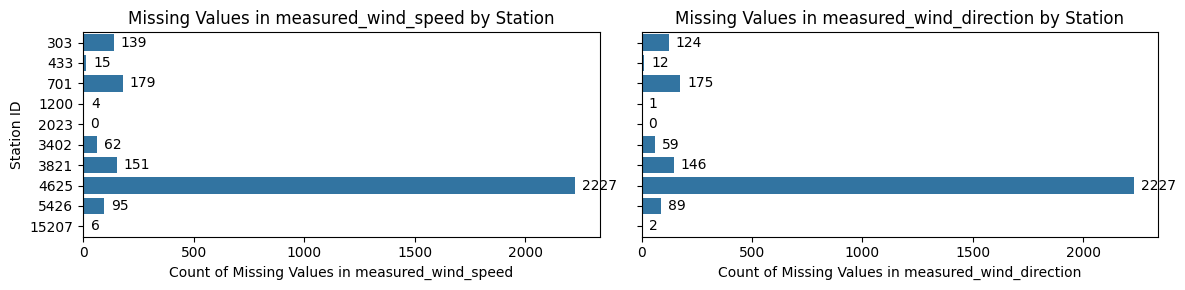

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def summarize_and_visualize_missing_values(data, cols):
    """
    Summarize and visualize the counts of missing values for specified columns for each station.

    Args:
    data (pd.DataFrame): The DataFrame containing the data with 'station_id' as index.
    cols (list): List of column names to check for missing values.

    Returns:
    pd.DataFrame: A DataFrame containing the count of missing values for each specified column for each station.
    Also visualizes the missing values using horizontal bar plots with counts on top of each bar.

    Example Usage:
    summary_df = summarize_and_visualize_missing_values(data, ['measured_wind_speed', 'measured_wind_direction'])
    print(summary_df)
    """
    # Summarize missing values for specified columns by station
    missing_summary = data.groupby('station_id')[cols].apply(lambda x: x.isna().sum())

    # Create a summary DataFrame
    missing_summary_df = missing_summary.reset_index()

    # Visualize the missing values
    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(12, 3), sharey=True)

    for i, col in enumerate(cols):
        ax = sns.barplot(x=col, y='station_id', data=missing_summary_df, orient='h', ax=axes[i])
        ax.set_title(f'Missing Values in {col} by Station')
        ax.set_xlabel(f'Count of Missing Values in {col}')
        ax.set_ylabel('Station ID' if i == 0 else '')

        # Add counts on top of each bar
        for p in ax.patches:
            width = p.get_width()
            ax.annotate(f'{int(width)}', xy=(width, p.get_y() + p.get_height() / 2),
                        xytext=(5, 0),  # 5 points horizontal offset
                        textcoords='offset points', ha='left', va='center')

    plt.tight_layout()
    plt.show()

    return missing_summary_df

summary_df = summarize_and_visualize_missing_values(df, ['measured_wind_speed', 'measured_wind_direction'])
# print(summary_df)


In [17]:
def clean_data(data, cols=None):
    """
    Clean the DataF by dropping rows with missing values.

    Args:
    data: The Data to clean.
    cols (list, optional): List of column names to check for missing values.
                           If None, drops rows with any missing values across all columns.

    Returns:
    pd.DataFrame: A cleaned data with rows with missing values dropped.

    Example Usage:
    df_cleaned = clean_data(df, ['measured_wind_speed', 'measured_wind_direction'])
    print(df_cleaned.info())
    """
    if cols is not None:
        data_cleaned = data.dropna(subset=cols)
    else:
        data_cleaned = data.dropna()

    return data_cleaned


# Clean the Data based on specific columns
df1 = df.copy()
df_cleaned = clean_data(df1, ['measured_wind_speed', 'measured_wind_direction'])
df_cleaned.info()

# Clean the Data by removing rows with any missing values
# df_cleaned_all = clean_data(df)
# print(df_cleaned_all.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84722 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84722 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84722 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                84722 non-null  float32        
 5   station_latitude                 84722 non-null  float32        
 6   station_height                   84722 non-null  float64        
 7   station_name                     84722 non-null  object         
 8   state                            84722 non-null  object         
 9   era5_wind_speed                  84722 non

In [18]:
def duplicate_rows(data):
    """
    Find and count duplicate rows in the DataFrame.

    Args:
    data (pd.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows in the DataFrame.

    Example Usage:
    duplicate_count = count_duplicate_rows(data)
    print(f'Total number of duplicate rows: {duplicate_count}')
    """
    # Count the number of duplicate rows
    duplicate_count = data.duplicated().sum()

    return duplicate_count
# Find and count duplicate rows
duplicate_count = duplicate_rows(df)
print(f'Total number of duplicate rows: {duplicate_count}')

Total number of duplicate rows: 0


Number of outliers in measured_wind_speed: 1376
Number of outliers in measured_wind_direction: 0


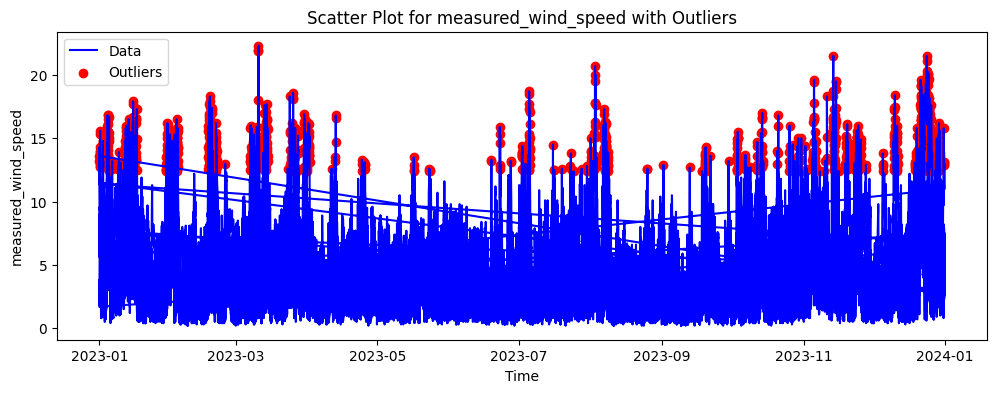

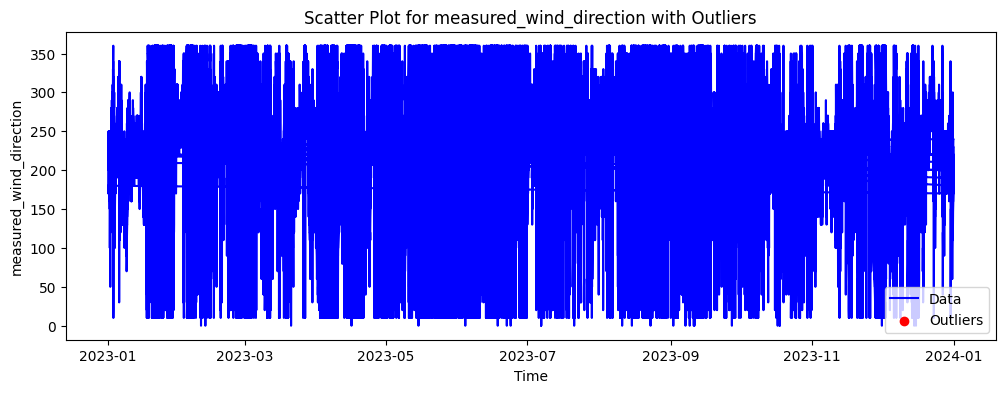

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_z_score(data, cols, threshold=3):
    """
    Detect outliers in specific columns of the DataFrame using the Z-score method.

    Args:
    data (pd.DataFrame): The DataFrame containing the data.
    cols (list): List of column names to check for outliers.
    threshold (float): The Z-score threshold to identify outliers.

    Returns:
    pd.DataFrame: A DataFrame with the same structure as input, where outliers are marked as True.
    """
    outliers = pd.DataFrame(index=data.index)
    outlier_counts = {}
    for col in cols:
        mean = data[col].mean()
        std = data[col].std()
        z_scores = (data[col] - mean) / std
        outliers[col] = np.abs(z_scores) > threshold
        outlier_counts[col] = outliers[col].sum()
        print(f'Number of outliers in {col}: {outlier_counts[col]}')
    return outliers

def plot_outliers(data, outliers, cols):
    """
    Plot the outliers detected by the IQR method using scatter plots.

    Args:
    data (pd.DataFrame): The DataFrame containing the data.
    outliers (pd.DataFrame): A DataFrame with the same structure as input, where outliers are marked as True.
    cols (list): List of column names to plot.
    """
    for col in cols:
        plt.figure(figsize=(12, 4))
        plt.plot(data.index.get_level_values('time'), data[col], label='Data', color='blue')
        plt.scatter(data.index.get_level_values('time')[outliers[col]], data[col][outliers[col]], color='red', label='Outliers')
        plt.title(f'Scatter Plot for {col} with Outliers')
        plt.xlabel('Time')
        plt.ylabel(col)
        plt.legend()
        plt.show()

columns_to_check = ['measured_wind_speed', 'measured_wind_direction']
outliers = detect_outliers_z_score(df_cleaned, columns_to_check)
plot_outliers(df_cleaned, outliers, columns_to_check)

Number of outliers in icon_d2_wind_speed: 848
Number of outliers in icon_d2_wind_direction: 0


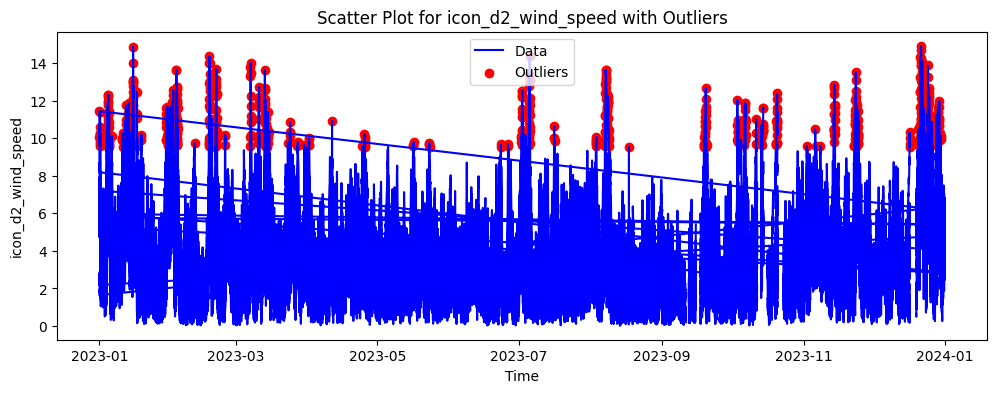

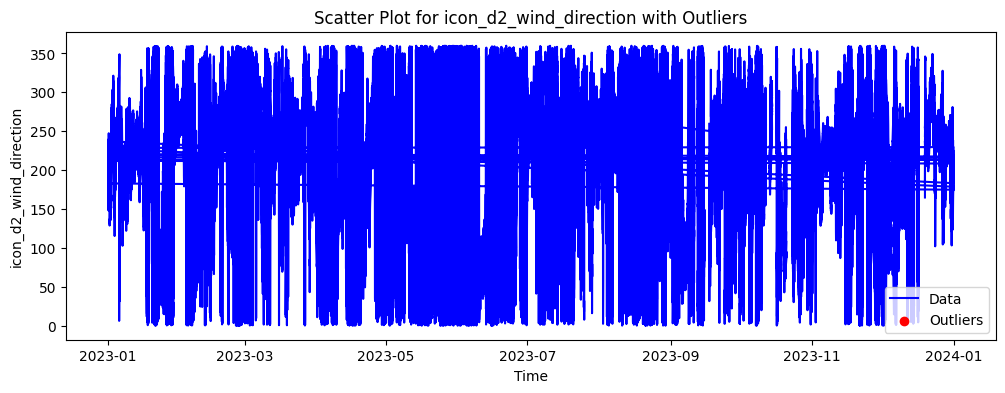

In [20]:
columns_to_check = ['icon_d2_wind_speed', 'icon_d2_wind_direction']
outliers = detect_outliers_z_score(df_cleaned, columns_to_check)
plot_outliers(df_cleaned, outliers, columns_to_check)

Number of outliers in icon_eu_wind_speed: 1015
Number of outliers in icon_eu_wind_direction: 0


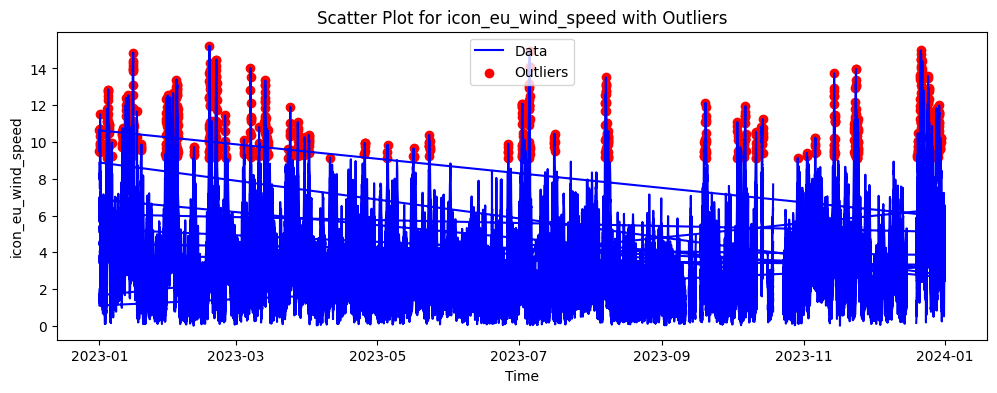

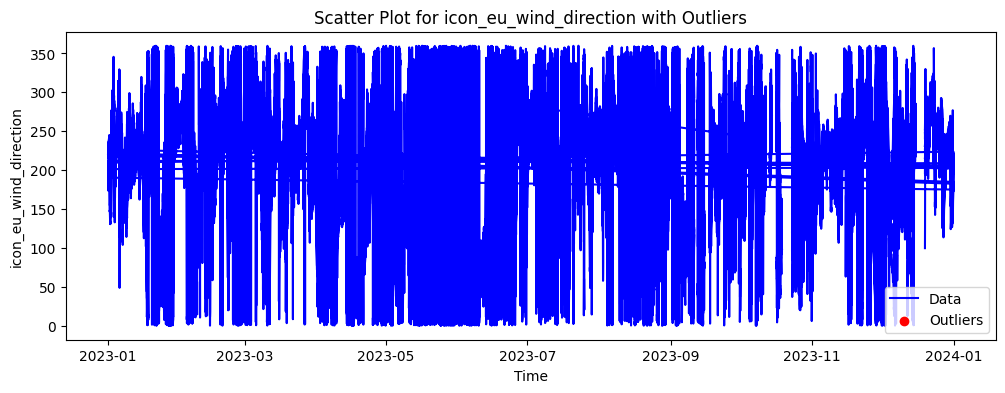

In [21]:
columns_to_check = ['icon_eu_wind_speed', 'icon_eu_wind_direction']
outliers = detect_outliers_z_score(df_cleaned, columns_to_check)
plot_outliers(df_cleaned, outliers, columns_to_check)

Number of outliers in era5_wind_speed: 681
Number of outliers in era5_wind_direction: 0


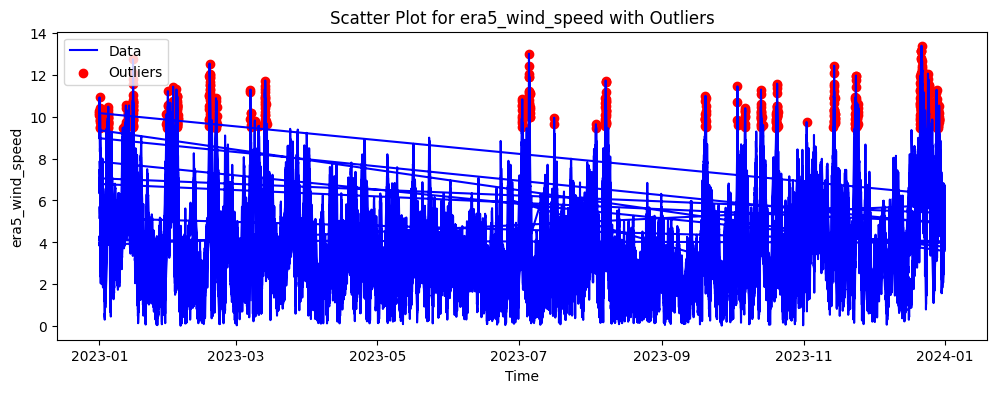

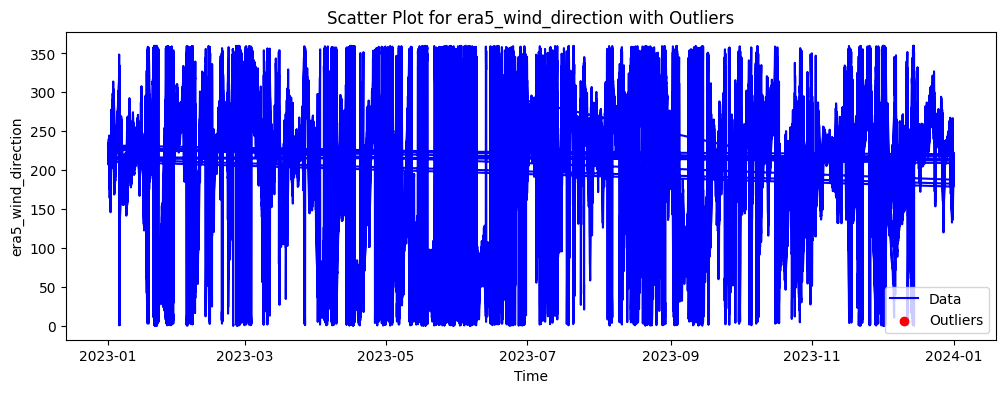

In [22]:
columns_to_check = ['era5_wind_speed', 'era5_wind_direction']
outliers = detect_outliers_z_score(df_cleaned, columns_to_check)
plot_outliers(df_cleaned, outliers, columns_to_check)

Number of outliers in measured_wind_speed: 3340
Number of outliers in measured_wind_direction: 0


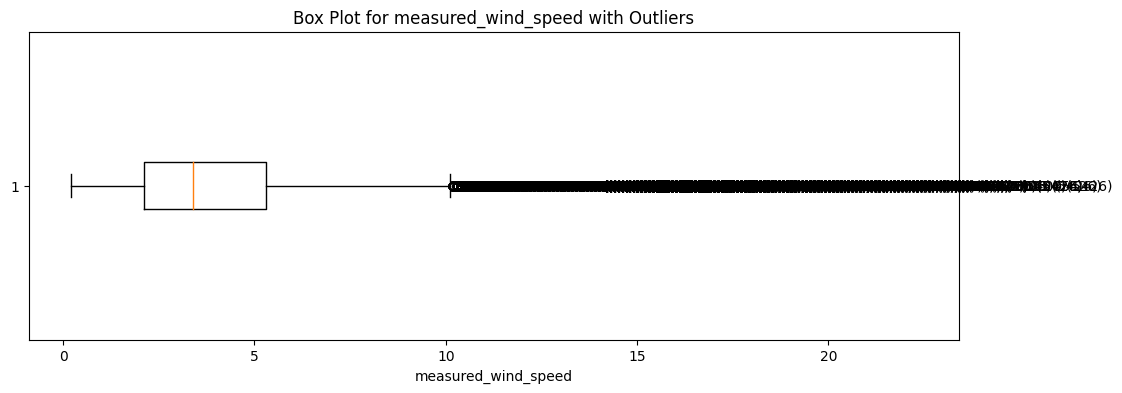

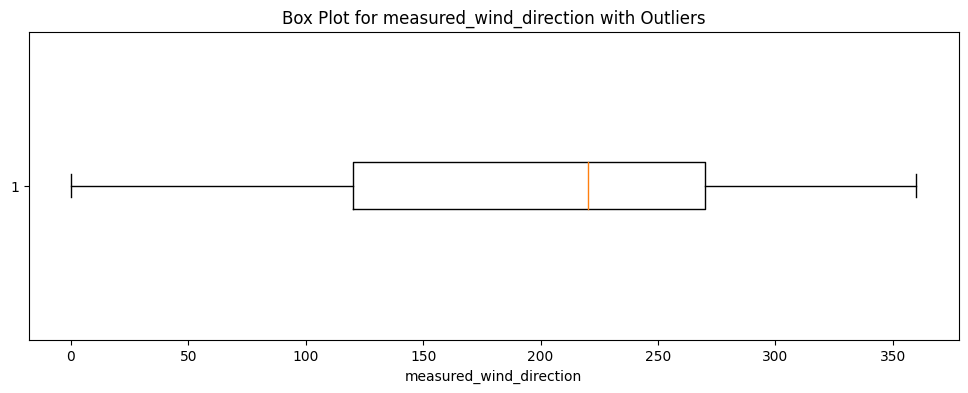

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = df_cleaned.copy()
def detect_outliers_iqr(data, cols):
    """
    Detect outliers in specific columns of the DataFrame using the IQR method.

    Args:
    data (pd.DataFrame): The DataFrame containing the data.
    cols (list): List of column names to check for outliers.

    Returns:
    pd.DataFrame: A DataFrame with the same structure as input, where outliers are marked as True.
    """
    outliers = pd.DataFrame(index=data.index)
    outlier_counts = {}
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outlier_counts[col] = outliers[col].sum()
        print(f'Number of outliers in {col}: {outlier_counts[col]}')
    return outliers, outlier_counts

def plot_outliers_iqr(data, outliers, cols):
    """
    Plot the outliers detected by the IQR method using box plots.

    Args:
    data (pd.DataFrame): The DataFrame containing the data.
    outliers (pd.DataFrame): A DataFrame with the same structure as input, where outliers are marked as True.
    cols (list): List of column names to plot.
    """
    for col in cols:
        plt.figure(figsize=(12, 4))
        plt.boxplot(data[col].dropna(), vert=False)
        outlier_indices = data[col][outliers[col]].index
        outlier_values = data[col][outliers[col]].values
        for i, (idx, val) in enumerate(zip(outlier_indices, outlier_values)):
            plt.text(val, 1, f'{idx[1]} ({idx[0]})', verticalalignment='center')
        plt.title(f'Box Plot for {col} with Outliers')
        plt.xlabel(col)
        plt.show()

# Example usage
# Assuming 'data' is your pandas DataFrame
columns_to_check = ['measured_wind_speed', 'measured_wind_direction']
outliers_iqr, outlier_counts = detect_outliers_iqr(data, columns_to_check)
plot_outliers_iqr(data, outliers_iqr, columns_to_check)


# Model Evaluation:

In [26]:
import numpy as np
import pandas as pd
data = df_cleaned.copy()
def calculate_metrics(observed, predicted):
    """
    Calculate MAE, RMSE, MBE, and R² between observed and predicted values.

    Args:
    observed (pd.Series): The observed values.
    predicted (pd.Series): The predicted values.

    Returns:
    dict: A dictionary with MAE, RMSE, MBE, and R².
    """
    mae = np.mean(np.abs(observed - predicted))
    rmse = np.sqrt(np.mean((observed - predicted) ** 2))
    mbe = np.mean(observed - predicted)
    r2 = 1 - (np.sum((observed - predicted) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MBE': mbe,
        'R': r2
    }

def evaluate_models(data, observed_col, model_cols):
    """
    Evaluate multiple models for wind speed and direction at different stations.

    Args:
    data (pd.DataFrame): The DataFrame containing observed and model data.
    observed_col (str): The column name for observed data.
    model_cols (list): A list of column names for model data.

    Returns:
    pd.DataFrame: A DataFrame with metrics for each model.
    """
    metrics = []

    for model_col in model_cols:
        station_metrics = data.groupby('station_id').apply(
            lambda df: pd.Series(calculate_metrics(df[observed_col], df[model_col]))
        )
        station_metrics['Model'] = model_col
        metrics.append(station_metrics)

    return pd.concat(metrics).reset_index()


# Wind speed evaluation
wind_speed_metrics = evaluate_models(data, 'measured_wind_speed', ['icon_d2_wind_speed', 'icon_eu_wind_speed', 'era5_wind_speed'])
print("Wind Speed Metrics:")
wind_speed_metrics




Wind Speed Metrics:


,station_id,MAE,RMSE,MBE,R,Model
0,303,0.730695,0.967633,0.221763,0.801366,icon_d2_wind_speed
1,433,0.923416,1.178979,0.795159,0.614739,icon_d2_wind_speed
2,701,1.532301,2.003292,1.447151,0.568290,icon_d2_wind_speed
3,1200,1.019959,1.328577,-0.016061,0.833989,icon_d2_wind_speed
4,2023,1.045081,1.382139,0.815017,0.587164,icon_d2_wind_speed
5,3402,0.703184,0.938096,-0.131685,0.674616,icon_d2_wind_speed
6,3821,0.966428,1.252929,-0.377686,0.495270,icon_d2_wind_speed
7,4625,0.791453,1.021088,0.418061,0.741775,icon_d2_wind_speed
8,5426,4.001448,4.618054,3.988107,-0.577487,icon_d2_wind_speed
9,15207,0.978444,1.248492,-0.769118,0.295582,icon_d2_wind_speed


<ipython-input-30-8696f4844ff7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(station_data['Model'], rotation=45, ha='right')


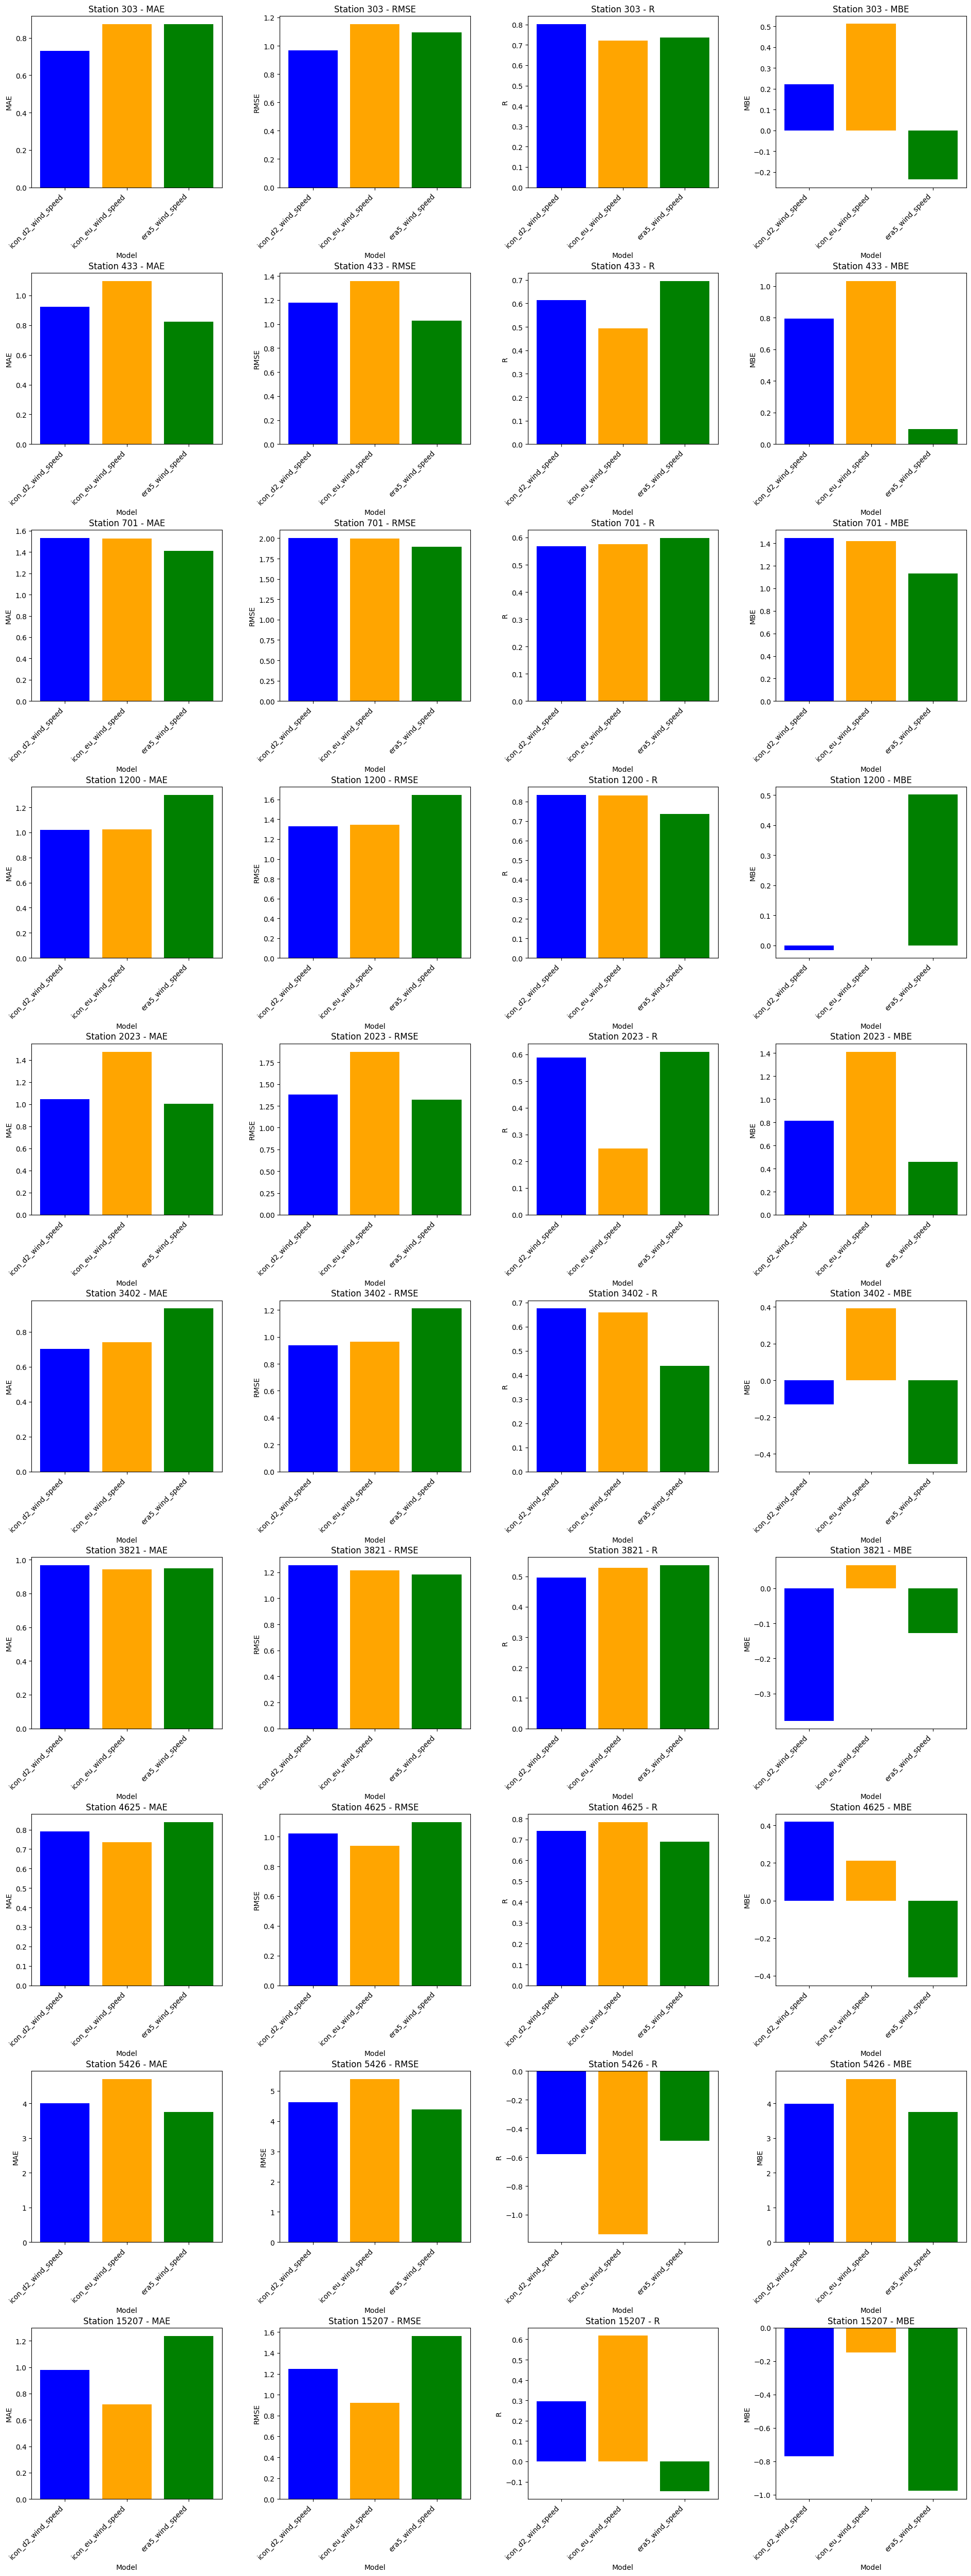

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# Get the unique stations and models
stations = wind_speed_metrics['station_id'].unique()
metrics = ['MAE', 'RMSE', 'R', 'MBE']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(stations), ncols=len(metrics), figsize=(20, 50))
fig.tight_layout(pad=5.0)

# Adjust spacing between rows
fig.subplots_adjust(hspace=0.5)

# Iterate over each station and plot the metrics
for i, station in enumerate(stations):
    station_data = wind_speed_metrics[wind_speed_metrics['station_id'] == station]

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        ax.bar(station_data['Model'], station_data[metric], color=['blue', 'orange', 'green'])
        ax.set_title(f'Station {station} - {metric}')
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.grid(False)
        ax.set_xticklabels(station_data['Model'], rotation=45, ha='right')

plt.show()


In [32]:
# Calculate average metrics for each model
average_metrics = wind_speed_metrics.groupby('Model').mean().reset_index()
print("Average Metrics by Model:")
# print(average_metrics)

Average Metrics by Model:


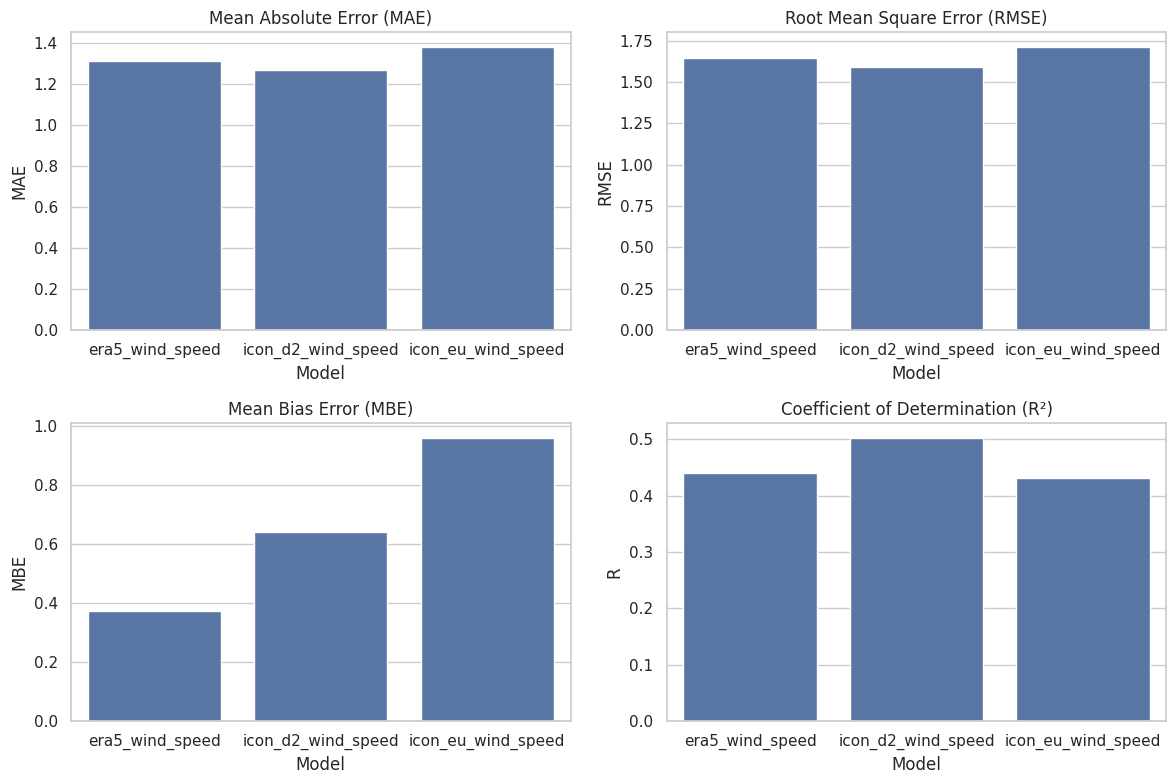

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# MAE
sns.barplot(x='Model', y='MAE', data=average_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')

# RMSE
sns.barplot(x='Model', y='RMSE', data=average_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Root Mean Square Error (RMSE)')

# MBE
sns.barplot(x='Model', y='MBE', data=average_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Mean Bias Error (MBE)')

# R²
sns.barplot(x='Model', y='R', data=average_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Coefficient of Determination (R²)')

plt.tight_layout()
plt.show()


In [35]:
wind_direction_metrics = evaluate_models(data, 'measured_wind_direction', ['icon_d2_wind_direction', 'icon_eu_wind_direction', 'era5_wind_direction'])
print("Wind Direction Metrics:")
wind_direction_metrics

Wind Direction Metrics:


,station_id,MAE,RMSE,MBE,R,Model
0,303,29.756947,67.136985,5.165799,0.401014,icon_d2_wind_direction
1,433,21.406289,55.800765,0.314039,0.638721,icon_d2_wind_direction
2,701,22.706519,60.984926,3.000645,0.569032,icon_d2_wind_direction
3,1200,21.816874,57.362121,0.696978,0.624545,icon_d2_wind_direction
4,2023,33.660533,73.022643,5.655345,0.384664,icon_d2_wind_direction
5,3402,38.733489,79.060493,-8.726583,0.352096,icon_d2_wind_direction
6,3821,25.055666,61.665231,8.892259,0.516879,icon_d2_wind_direction
7,4625,22.198915,60.265391,-1.431079,0.577599,icon_d2_wind_direction
8,5426,33.197488,72.166179,-13.839007,0.429734,icon_d2_wind_direction
9,15207,55.110597,99.552493,12.368062,0.045526,icon_d2_wind_direction


<ipython-input-37-c0319ec29b38>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(station_data['Model'], rotation=45, ha='right')


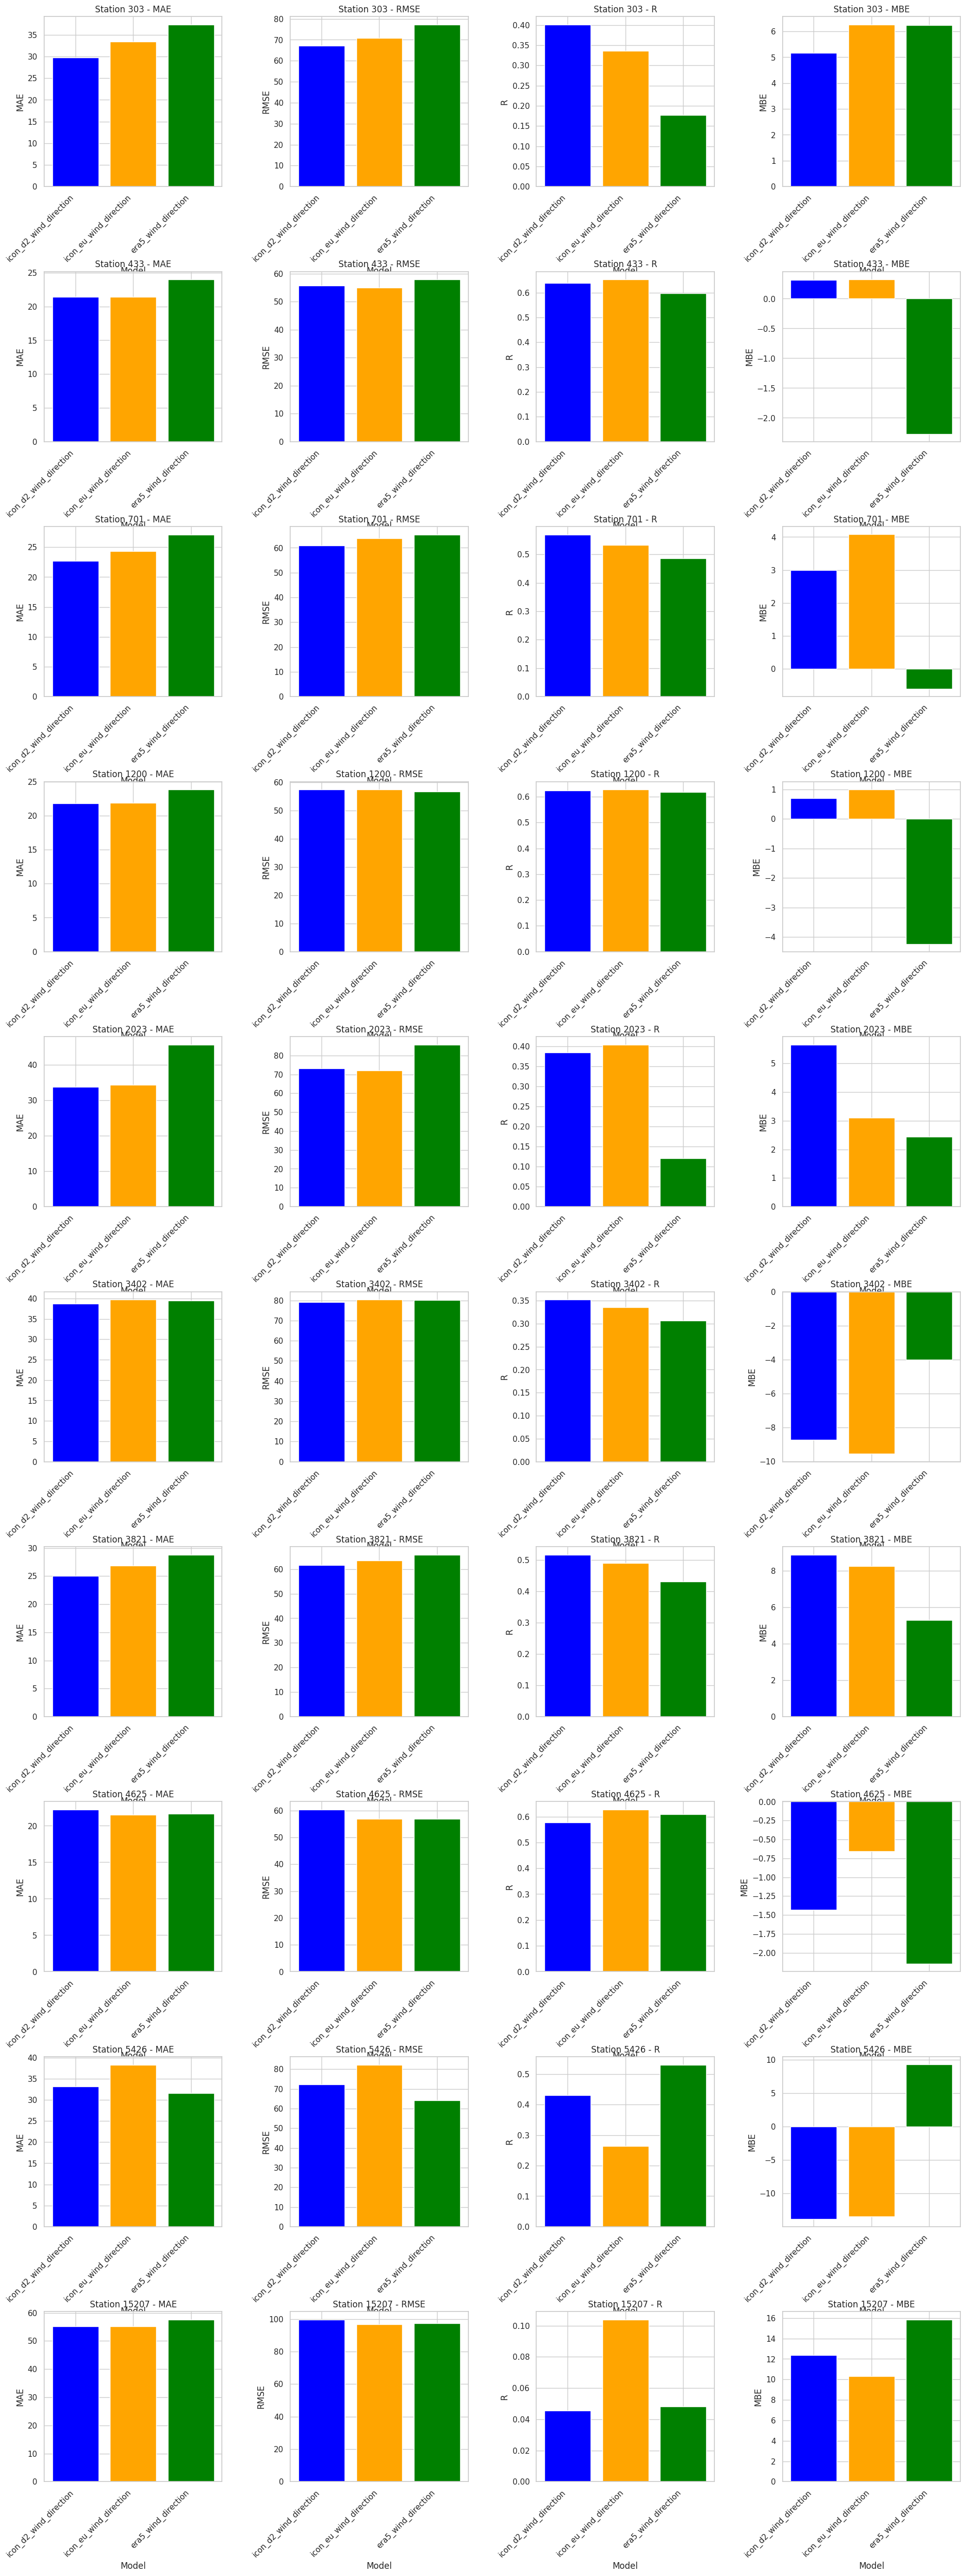

In [37]:

# Get the unique stations and models
stations = wind_direction_metrics['station_id'].unique()
metrics = ['MAE', 'RMSE', 'R', 'MBE']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(stations), ncols=len(metrics), figsize=(20, 50))
fig.tight_layout(pad=5.0)

# Adjust spacing between rows
fig.subplots_adjust(hspace=0.5)

# Iterate over each station and plot the metrics
for i, station in enumerate(stations):
    station_data = wind_direction_metrics[wind_direction_metrics['station_id'] == station]

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        ax.bar(station_data['Model'], station_data[metric], color=['blue', 'orange', 'green'])
        ax.set_title(f'Station {station} - {metric}')
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.grid(True)
        ax.set_xticklabels(station_data['Model'], rotation=45, ha='right')

plt.show()


In [38]:
# Calculate average metrics for each model
average_metrics = wind_direction_metrics.groupby('Model').mean().reset_index()
print("Average Metrics by Model:")
print(average_metrics)

Average Metrics by Model:
                    Model  station_id        MAE       RMSE       MBE  \
0     era5_wind_direction      3714.1  33.689222  70.759476  2.589136   
1  icon_d2_wind_direction      3714.1  30.364332  68.701723  1.209646   
2  icon_eu_wind_direction      3714.1  31.699101  69.898376  0.965991   

          R  
0  0.392346  
1  0.453981  
2  0.437118  


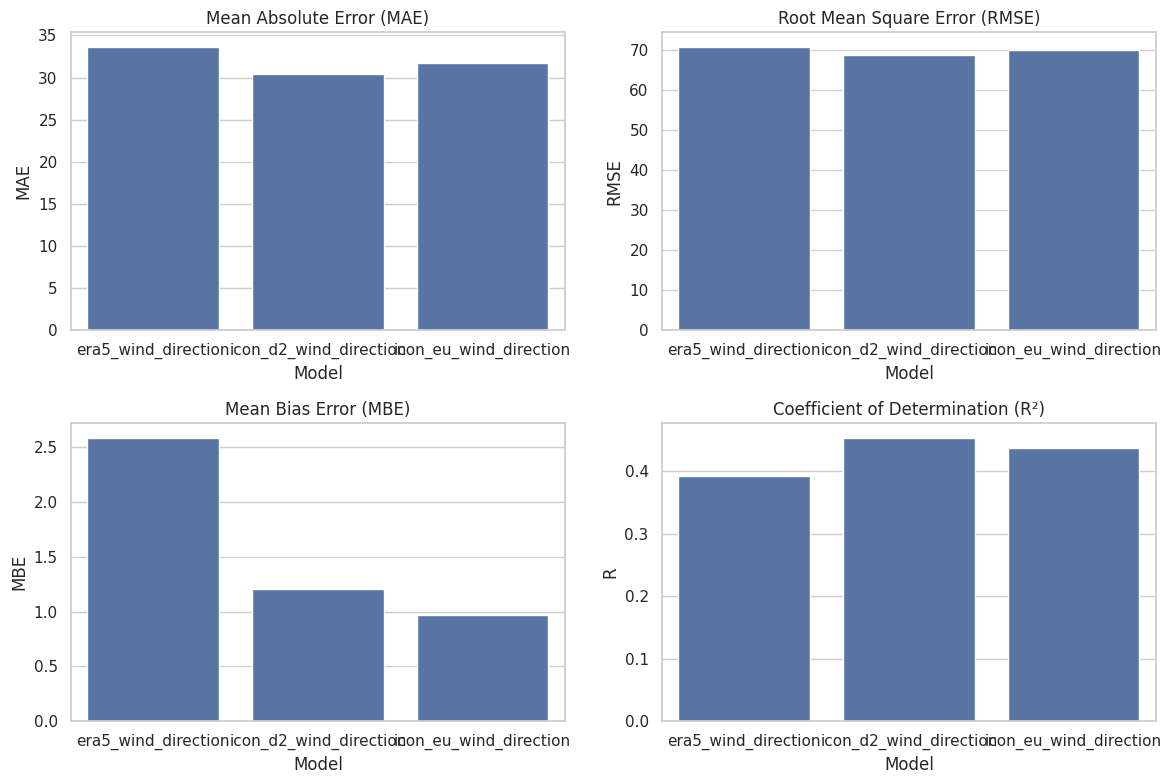

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# MAE
sns.barplot(x='Model', y='MAE', data=average_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')

# RMSE
sns.barplot(x='Model', y='RMSE', data=average_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Root Mean Square Error (RMSE)')

# MBE
sns.barplot(x='Model', y='MBE', data=average_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Mean Bias Error (MBE)')

# R²
sns.barplot(x='Model', y='R', data=average_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Coefficient of Determination (R²)')

plt.tight_layout()
plt.show()


In [ ]:
print(sdfs)

# Training LSTM Deep Learning Model

In [41]:
def clean_data(data, cols=None):
    """
    Clean the DataF by dropping rows with missing values.

    Args:
    data: The Data to clean.
    cols (list, optional): List of column names to check for missing values.
                           If None, drops rows with any missing values across all columns.

    Returns:
    pd.DataFrame: A cleaned data with rows with missing values dropped.

    Example Usage:
    df_cleaned = clean_data(df, ['measured_wind_speed', 'measured_wind_direction'])
    print(df_cleaned.info())
    """
    if cols is not None:
        data_cleaned = data.dropna(subset=cols)
    else:
        data_cleaned = data.dropna()

    return data_cleaned


# Clean the Data based on specific columns
df1 = df.copy()
df_cleaned = clean_data(df1, ['measured_wind_speed', 'measured_wind_direction'])
df_cleaned.info()

# Clean the Data by removing rows with any missing values
# df_cleaned_all = clean_data(df)
# print(df_cleaned_all.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84722 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84722 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84722 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                84722 non-null  float32        
 5   station_latitude                 84722 non-null  float32        
 6   station_height                   84722 non-null  float64        
 7   station_name                     84722 non-null  object         
 8   state                            84722 non-null  object         
 9   era5_wind_speed                  84722 non

In [42]:
full_clean_data = clean_data(df_cleaned)

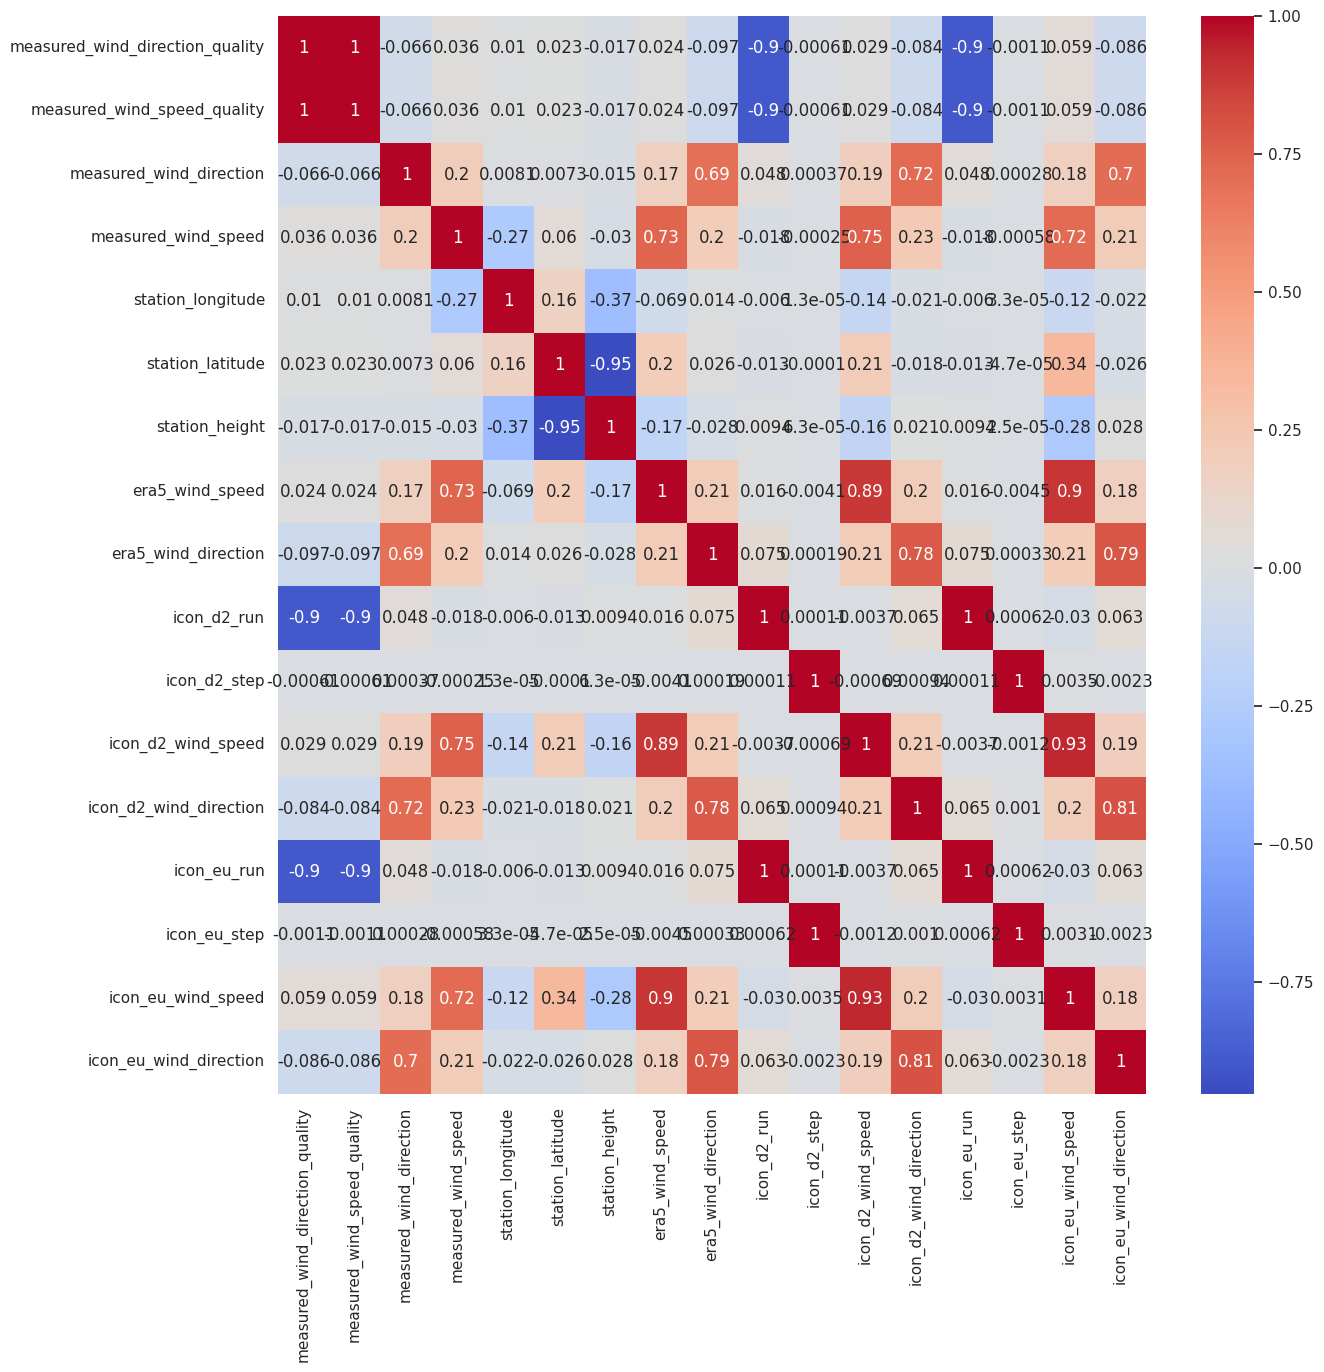

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df_drop = full_clean_data.drop(['state', 'station_name'], axis = 1)
# Compute the correlation matrix
corr_matrix = df_drop.corr()


# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [44]:
full_clean_data.reset_index(inplace=True)
wind_speed_data = full_clean_data[['station_id','era5_wind_speed','icon_d2_wind_speed','icon_eu_wind_speed', 'measured_wind_speed']]
wind_direction_data = full_clean_data[['station_id','era5_wind_direction','icon_d2_wind_direction','icon_eu_wind_direction', 'measured_wind_direction']]

In [45]:
wind_speed_data

,station_id,era5_wind_speed,icon_d2_wind_speed,icon_eu_wind_speed,measured_wind_speed
0,303,7.449884,6.731338,6.162262,8.9
1,303,7.387481,6.974697,6.154730,8.5
2,303,7.182247,6.809517,5.927979,8.1
3,303,6.843245,6.157245,5.640130,7.7
4,303,6.511669,6.423289,5.907619,8.1
...,...,...,...,...,...
80982,15207,6.467078,4.552577,4.916092,3.4
80983,15207,6.631641,5.539249,5.301341,4.0
80984,15207,6.457904,5.838445,5.281361,4.8
80985,15207,5.555748,6.020338,5.198024,4.9


In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Define columns
feature_columns = ['station_id', 'era5_wind_speed', 'icon_d2_wind_speed', 'icon_eu_wind_speed']
target_column = 'measured_wind_speed'

# Normalize the features
scaler = MinMaxScaler()
wind_speed_data[feature_columns] = scaler.fit_transform(wind_speed_data[feature_columns])
# Normalize the target column
# target_scaler = MinMaxScaler()
# wind_speed_data[target_column] = target_scaler.fit_transform(wind_speed_data[[target_column]])







# Optional: Predict
# predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)


<ipython-input-48-9470f66ec93c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_speed_data[feature_columns] = scaler.fit_transform(wind_speed_data[feature_columns])


In [49]:
# Function to create sequences
def create_sequences(data, feature_columns, target_column, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_columns].iloc[i:i + time_steps].values)
        y.append(data[target_column].iloc[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 10
X, y = create_sequences(wind_speed_data, feature_columns, target_column, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [50]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, len(feature_columns))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/50
1620/1620 [==============================] - 30s 15ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 2/50
1620/1620 [==============================] - 25s 15ms/step - loss: 0.0027 - val_loss: 0.0106
Epoch 3/50
1620/1620 [==============================] - 23s 14ms/step - loss: 0.0026 - val_loss: 0.0060
Epoch 4/50
1620/1620 [==============================] - 24s 15ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 5/50
1620/1620 [==============================] - 24s 15ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 6/50
1620/1620 [==============================] - 23s 14ms/step - loss: 0.0024 - val_loss: 0.0059
Epoch 7/50
1620/1620 [==============================] - 24s 15ms/step - loss: 0.0024 - val_loss: 0.0059
Epoch 8/50
1620/1620 [==============================] - 25s 15ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 9/50
1620/1620 [==============================] - 24s 15ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 10/50
1620/1620 [==============================] - 24s 15m

In [ ]:
import matplotlib.pyplot as plt
target_scaler = MinMaxScaler()
# Generate predictions
predictions = model.predict(X_test)
# predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1))
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted Wind Speeds')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()
